##### Suppose you want to send a subset of the features through the wide path and a different subset (possibly overlapping) through the deep path. In this case, one solution is to use multiple inputs.

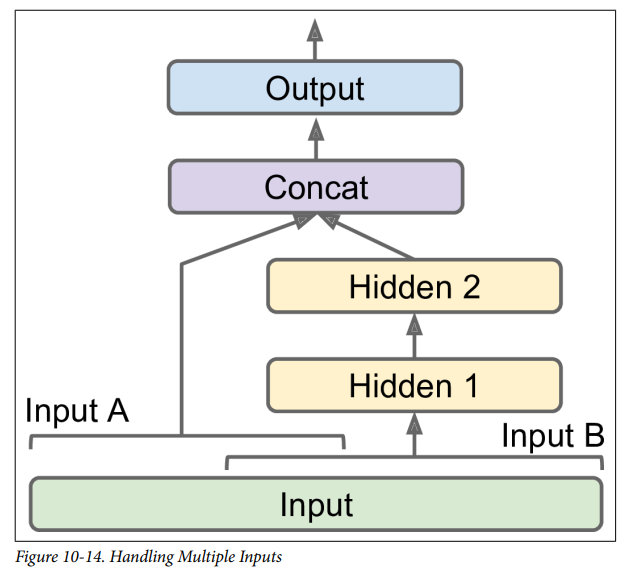

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
## IMPORTS
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
housing = fetch_california_housing()

In [4]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [6]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

There are total of 8 features in the dataset. So let's send 0 to 4 to first input and from 2 to 7 to the second input

In [7]:
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
## creating a model
input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='output')(concat)

model = keras.Model(inputs=[input_A, input_B], outputs=[output])

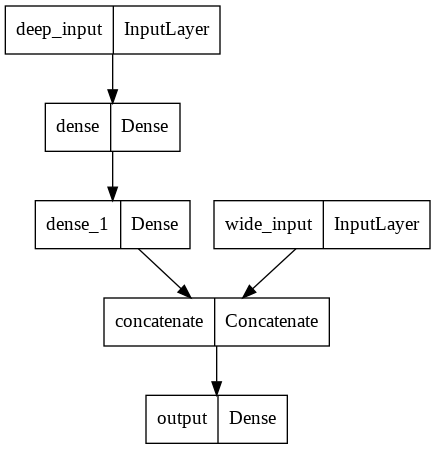

In [9]:
## visualizing the model
keras.utils.plot_model(model)

In [10]:
## compiling the model
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.SGD(lr=1e-3));

In [11]:
## getting the training and testing and validation data for the inputs

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]

In [12]:
## fitting the model
history = model.fit((X_train_A, X_train_B), y_train, epochs=10, validation_data=((X_valid_A, X_valid_B), y_valid))

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 2.1999 - val_loss: 1.0087
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.7935 - val_loss: 0.7229
Epoch 3/10
363/363 [==============================] - 2s 5ms/step - loss: 0.6412 - val_loss: 0.6379
Epoch 4/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5828 - val_loss: 0.5990
Epoch 5/10
363/363 [==============================] - 2s 4ms/step - loss: 0.5519 - val_loss: 0.5769
Epoch 6/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5321 - val_loss: 0.5610
Epoch 7/10
363/363 [==============================] - 2s 5ms/step - loss: 0.5186 - val_loss: 0.5502
Epoch 8/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5082 - val_loss: 0.5412
Epoch 9/10
363/363 [==============================] - 2s 6ms/step - loss: 0.5009 - val_loss: 0.5345
Epoch 10/10
363/363 [==============================] - 2s 4ms/step - loss: 0.4944 - val_loss: 0.5294

In [13]:
history_df = pd.DataFrame(history.history)
history_df.head()

,loss,val_loss
0,2.199872,1.008716
1,0.793455,0.722931
2,0.641193,0.637912
3,0.582765,0.598994
4,0.551925,0.576920


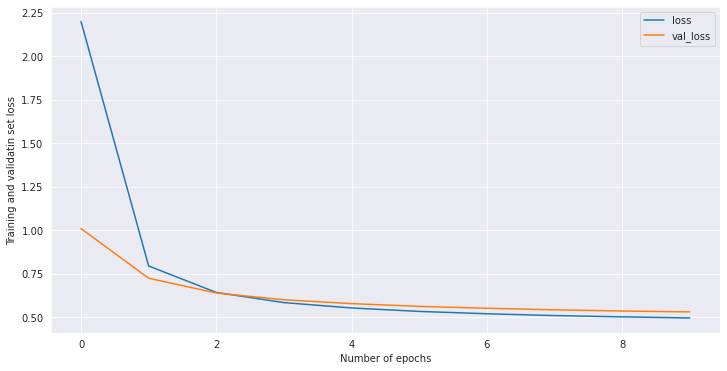

In [14]:
## plotting the history_df
sns.set_style('darkgrid')
history_df.plot(figsize=(12,6))
plt.grid(True)
plt.xlabel('Number of epochs')
plt.ylabel('Training and validatin set loss')
plt.show();

In [15]:
## evaluating the model on the test data
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
mse_test

162/162 [==============================] - 1s 4ms/step - loss: 0.4994


0.4994094669818878

In [16]:
## since we don't have the data for prediction let's take first three rows from the test set
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [17]:
## making predictions using the trained model on new data
y_pred = model.predict((X_new_A, X_new_B))
y_pred

array([[1.7543461],
       [2.958442 ],
       [1.7519023]], dtype=float32)

In [18]:
y_test[:3]

array([1.547, 3.604, 1.456])